## Data Import

In [87]:
import pandas as pd

# import data from data/ directory
df_train = pd.read_csv('data/train.csv')
df_store = pd.read_csv('data/store.csv')

/tmp/ipykernel_22970/2879780261.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('data/train.csv')


## Data overview

In [88]:
df_train.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
256772,910,3,2014-12-10,5778,538,1,0,0,0
830671,782,1,2013-06-17,5798,529,1,1,0,0
430179,575,3,2014-06-11,4808,444,1,0,0,1
37642,848,7,2015-06-28,0,0,0,0,0,0
44936,337,7,2015-06-21,0,0,0,0,0,0


In [89]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [90]:
# check for missing values
df_train.isnull().sum()


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

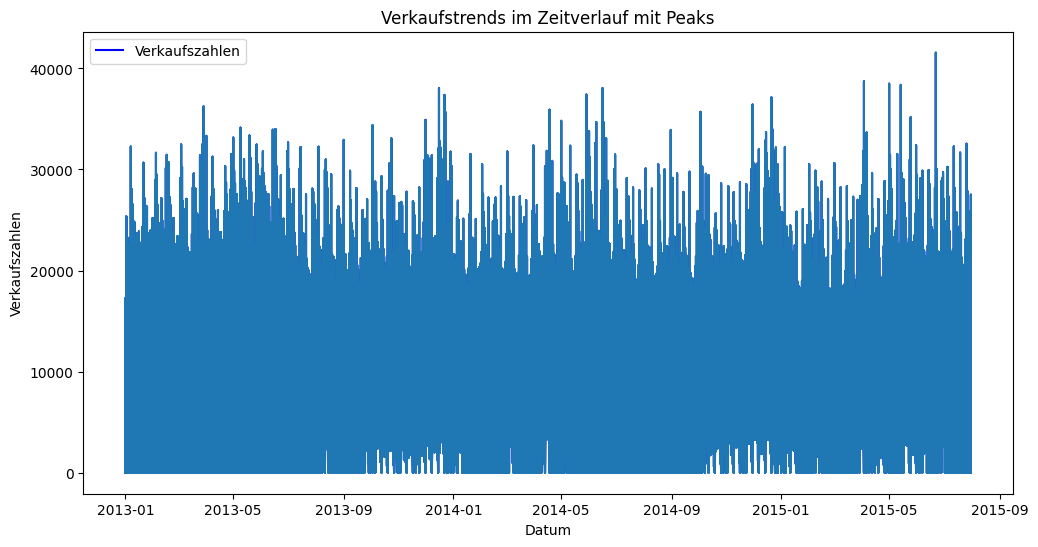

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: Die Spalte 'Date' ist im datetime-Format
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Verkaufstrends im Zeitverlauf plotten
plt.figure(figsize=(12, 6))
plt.plot(df_train['Date'], df_train['Sales'], label='Verkaufszahlen', color='blue')

# Peaks markieren
plt.plot(df_train['Date'], df_train['Sales'])

plt.title('Verkaufstrends im Zeitverlauf mit Peaks')
plt.xlabel('Datum')
plt.ylabel('Verkaufszahlen')
plt.legend()
plt.show()


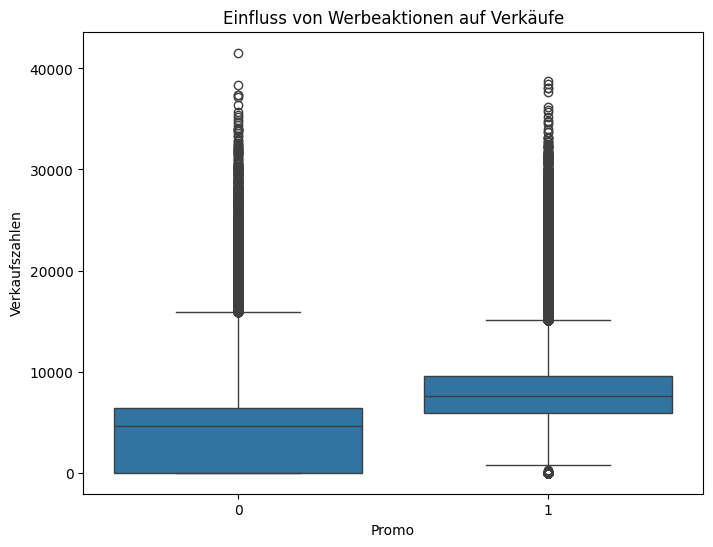

In [92]:
import seaborn as sns

# Boxplot zur Visualisierung des Einflusses von Werbeaktionen auf Verkäufe
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['Promo'], y=df_train['Sales'])
plt.title('Einfluss von Werbeaktionen auf Verkäufe')
plt.xlabel('Promo')
plt.ylabel('Verkaufszahlen')
plt.show()


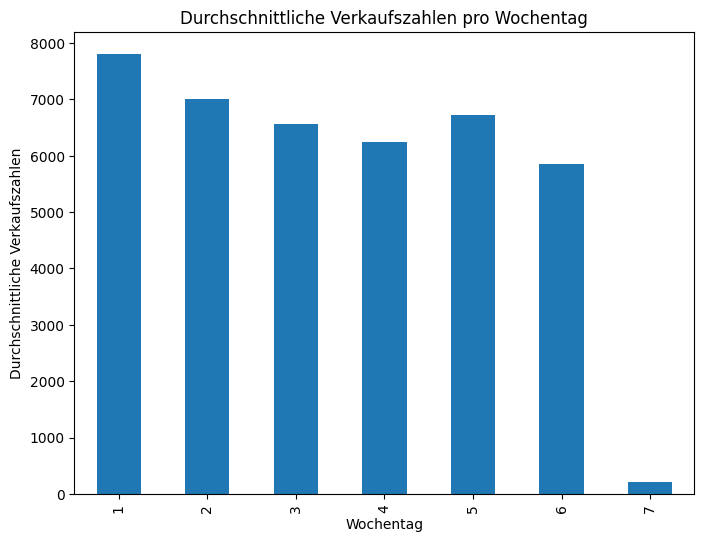

In [93]:
# Durchschnittliche Verkaufszahlen pro Wochentag
average_sales_per_day = df_train.groupby('DayOfWeek')['Sales'].mean()

# Balkendiagramm zur Visualisierung der durchschnittlichen Verkaufszahlen pro Wochentag
plt.figure(figsize=(8, 6))
average_sales_per_day.plot(kind='bar')
plt.title('Durchschnittliche Verkaufszahlen pro Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('Durchschnittliche Verkaufszahlen')
plt.show()


In [94]:
df_trainstore = pd.merge(df_train, df_store, on='Store')

df_trainstore

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [95]:
df_trainstore.dtypes


Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [96]:
df_trainstore['Month'] = df_trainstore['Date'].dt.month


In [97]:
df_trainstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [98]:
# import datetime
from datetime import datetime

# splitt date into day, month, year
df_trainstore['Day'] = df_trainstore['Date'].dt.day
df_trainstore['Month'] = df_trainstore['Date'].dt.month
df_trainstore['Year'] = df_trainstore['Date'].dt.year

# get week number with iso format
df_trainstore['Week'] = df_trainstore['Date'].dt.isocalendar().week
df_trainstore['Quarter'] = df_trainstore['Date'].dt.quarter

# remove date column
df_trainstore = df_trainstore.drop('Date', axis=1)

In [99]:
df_trainstore.sample(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Day,Year,Week,Quarter
278134,307,1,3647,368,1,1,0,0,a,a,...,2002.0,0,NaN,NaN,NaN,1,26,2015,5,1
587581,645,7,0,0,0,0,0,0,a,a,...,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov",11,17,2013,46,4
635538,698,5,12662,1628,1,0,0,0,a,a,...,2011.0,0,NaN,NaN,NaN,9,26,2014,39,3
923822,1013,1,6893,688,1,1,0,0,a,a,...,2015.0,1,31.0,2013.0,"Feb,May,Aug,Nov",3,4,2013,10,1
93963,103,1,0,0,0,1,0,0,d,c,...,2015.0,0,NaN,NaN,NaN,4,29,2013,18,2
37130,41,4,5460,426,1,1,0,0,d,c,...,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,23,2014,4,1
765782,841,4,0,0,0,0,a,0,a,a,...,2004.0,0,NaN,NaN,NaN,5,14,2015,20,2
632665,695,3,7306,612,1,1,0,0,a,a,...,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",11,12,2014,46,4
612527,673,4,7988,618,1,1,0,0,d,c,...,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",10,9,2014,41,4
79503,87,4,5076,700,1,0,0,0,a,a,...,2010.0,0,NaN,NaN,NaN,2,28,2013,9,1


In [100]:
# use one hot encoding for categorical variables
df_trainstore = pd.get_dummies(df_trainstore, columns=['StoreType', 'Assortment', 'StateHoliday'])

# convert dummies to int
df_trainstore = df_trainstore.astype({'StateHoliday_0': 'int', 'StateHoliday_a': 'int', 'StateHoliday_b': 'int', 'StateHoliday_c': 'int'})

# convert dummies storetype, assortment to int
df_trainstore = df_trainstore.astype({'StoreType_a': 'int', 'StoreType_b': 'int', 'StoreType_c': 'int', 'StoreType_d': 'int'})
df_trainstore = df_trainstore.astype({'Assortment_a': 'int', 'Assortment_b': 'int', 'Assortment_c': 'int'})

df_trainstore.sample()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
373420,409,6,4696,480,1,0,0,840.0,NaN,NaN,...,0,1,0,0,1,0,1,0,0,0


In [101]:
# map promo interval to numerical
promo_interval_map = {'Jan,Apr,Jul,Oct': 1, 'Feb,May,Aug,Nov': 2, 'Mar,Jun,Sept,Dec': 3}
df_trainstore['PromoInterval'] = df_trainstore['PromoInterval'].map(promo_interval_map)

# if promo2 is 0 then promo2sinceweek, promo2sinceyear, promointerval are 0
df_trainstore['Promo2SinceWeek'] = df_trainstore['Promo2SinceWeek'].fillna(0)
df_trainstore['Promo2SinceYear'] = df_trainstore['Promo2SinceYear'].fillna(0)
df_trainstore['PromoInterval'] = df_trainstore['PromoInterval'].fillna(0)

df_trainstore.sample(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
445037,488,4,3469,397,1,1,0,2890.0,4.0,2014.0,...,0,0,0,0,1,0,1,0,0,0
855470,939,1,7129,701,1,0,1,1340.0,NaN,NaN,...,0,1,1,0,0,0,1,0,0,0
110352,121,2,5362,616,1,1,0,3570.0,11.0,2009.0,...,0,0,1,0,0,0,1,0,0,0
101878,112,2,5549,756,1,0,0,1630.0,9.0,2009.0,...,0,0,1,0,0,0,1,0,0,0
393724,432,3,11631,1706,1,1,0,810.0,5.0,2013.0,...,0,0,1,0,0,0,1,0,0,0
654810,720,6,5793,661,1,0,0,15320.0,3.0,2011.0,...,0,0,0,0,1,1,0,0,0,0
379198,416,6,12085,1742,1,0,0,4650.0,6.0,2014.0,...,0,0,0,0,1,0,1,0,0,0
925394,1015,5,6985,576,1,1,0,9910.0,12.0,2010.0,...,0,1,0,0,1,0,1,0,0,0
288896,318,5,9359,856,1,1,0,32330.0,3.0,2014.0,...,0,1,0,0,1,0,1,0,0,0
687429,755,6,7572,727,1,0,0,13130.0,12.0,2003.0,...,0,1,0,0,1,0,1,0,0,0


In [102]:
# check for missing values
df_trainstore.isnull().sum()

# fill missing values with 0
df_trainstore.fillna(0, inplace=True)

df_trainstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 31 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   SchoolHoliday              1017209 non-null  int64  
 7   CompetitionDistance        1017209 non-null  float64
 8   CompetitionOpenSinceMonth  1017209 non-null  float64
 9   CompetitionOpenSinceYear   1017209 non-null  float64
 10  Promo2                     1017209 non-null  int64  
 11  Promo2SinceWeek            1017209 non-null  float64
 12  Promo2SinceYear            1017209 non-null  float64
 13  PromoInterva

In [103]:
# df_trainstore['Date'] = pd.to_datetime(df_trainstore['Year'].astype(str) + '-' + df_trainstore['Month'].astype(str) + '-' + df_trainstore['Day'].astype(str))
# print(len(df_trainstore))


# # Sort the DataFrame by Store and Date
# df_trainstore = df_trainstore.sort_values(by=['Store', 'Date'])


# # Create a new DataFrame for the last 7 days for each store
# df_last7days = df_trainstore.groupby('Store').tail(7)

# # Create a new DataFrame with the sum of sales and customers for the last 7 days
# df_last7days_sum = df_last7days.groupby('Store').agg({
#     'Sales': 'sum',
#     'Customers': 'sum'
# }).reset_index()

# # Merge the sum data back into the original DataFrame
# df_trainstore = pd.merge(df_trainstore, df_last7days_sum, on='Store', how='left', suffixes=('', '_Last7Days'))

# # Create new columns
# df_trainstore['SalesPerCustomer'] = df_trainstore['Sales'] / df_trainstore['Customers']
# df_trainstore['SalesLastWeek'] = df_trainstore['Sales_Last7Days']
# df_trainstore['CustomersLastWeek'] = df_trainstore['Customers_Last7Days']


# print("len sales_last7days: ", df_trainstore['Sales_Last7Days'].isna().sum())
# print("len customers_last7days: ", df_trainstore['Customers_Last7Days'].isna().sum())
# print("count 0 values in customer last 7 days: ", df_trainstore[df_trainstore['Customers_Last7Days'] == 0].shape[0])

# df_trainstore['SalesPerCustomerLastWeek'] = df_trainstore['Sales_Last7Days'] / df_trainstore['Customers_Last7Days']

# print("len salespercustomerlastweek: ", df_trainstore['SalesPerCustomerLastWeek'].isna().sum())

# # Drop unnecessary columns
# df_trainstore = df_trainstore.drop(['Sales_Last7Days', 'Customers_Last7Days'], axis=1)

# # Print or view the updated DataFrame
# df_trainstore.sample()

In [104]:
# # if sales is 0 then sales per customer is 0
# df_trainstore['SalesPerCustomer'] = df_trainstore['SalesPerCustomer'].fillna(0)

# df_trainstore.info()

In [105]:
# # fill na values with 0 for sales per customer last week
# df_trainstore['SalesPerCustomerLastWeek'] = df_trainstore['SalesPerCustomerLastWeek'].fillna(0)

# df_trainstore.info()

In [106]:
df_trainstore.sample()

# drop the 4th last column
df_trainstore.drop(df_trainstore.columns[-4], axis=1, inplace=True)


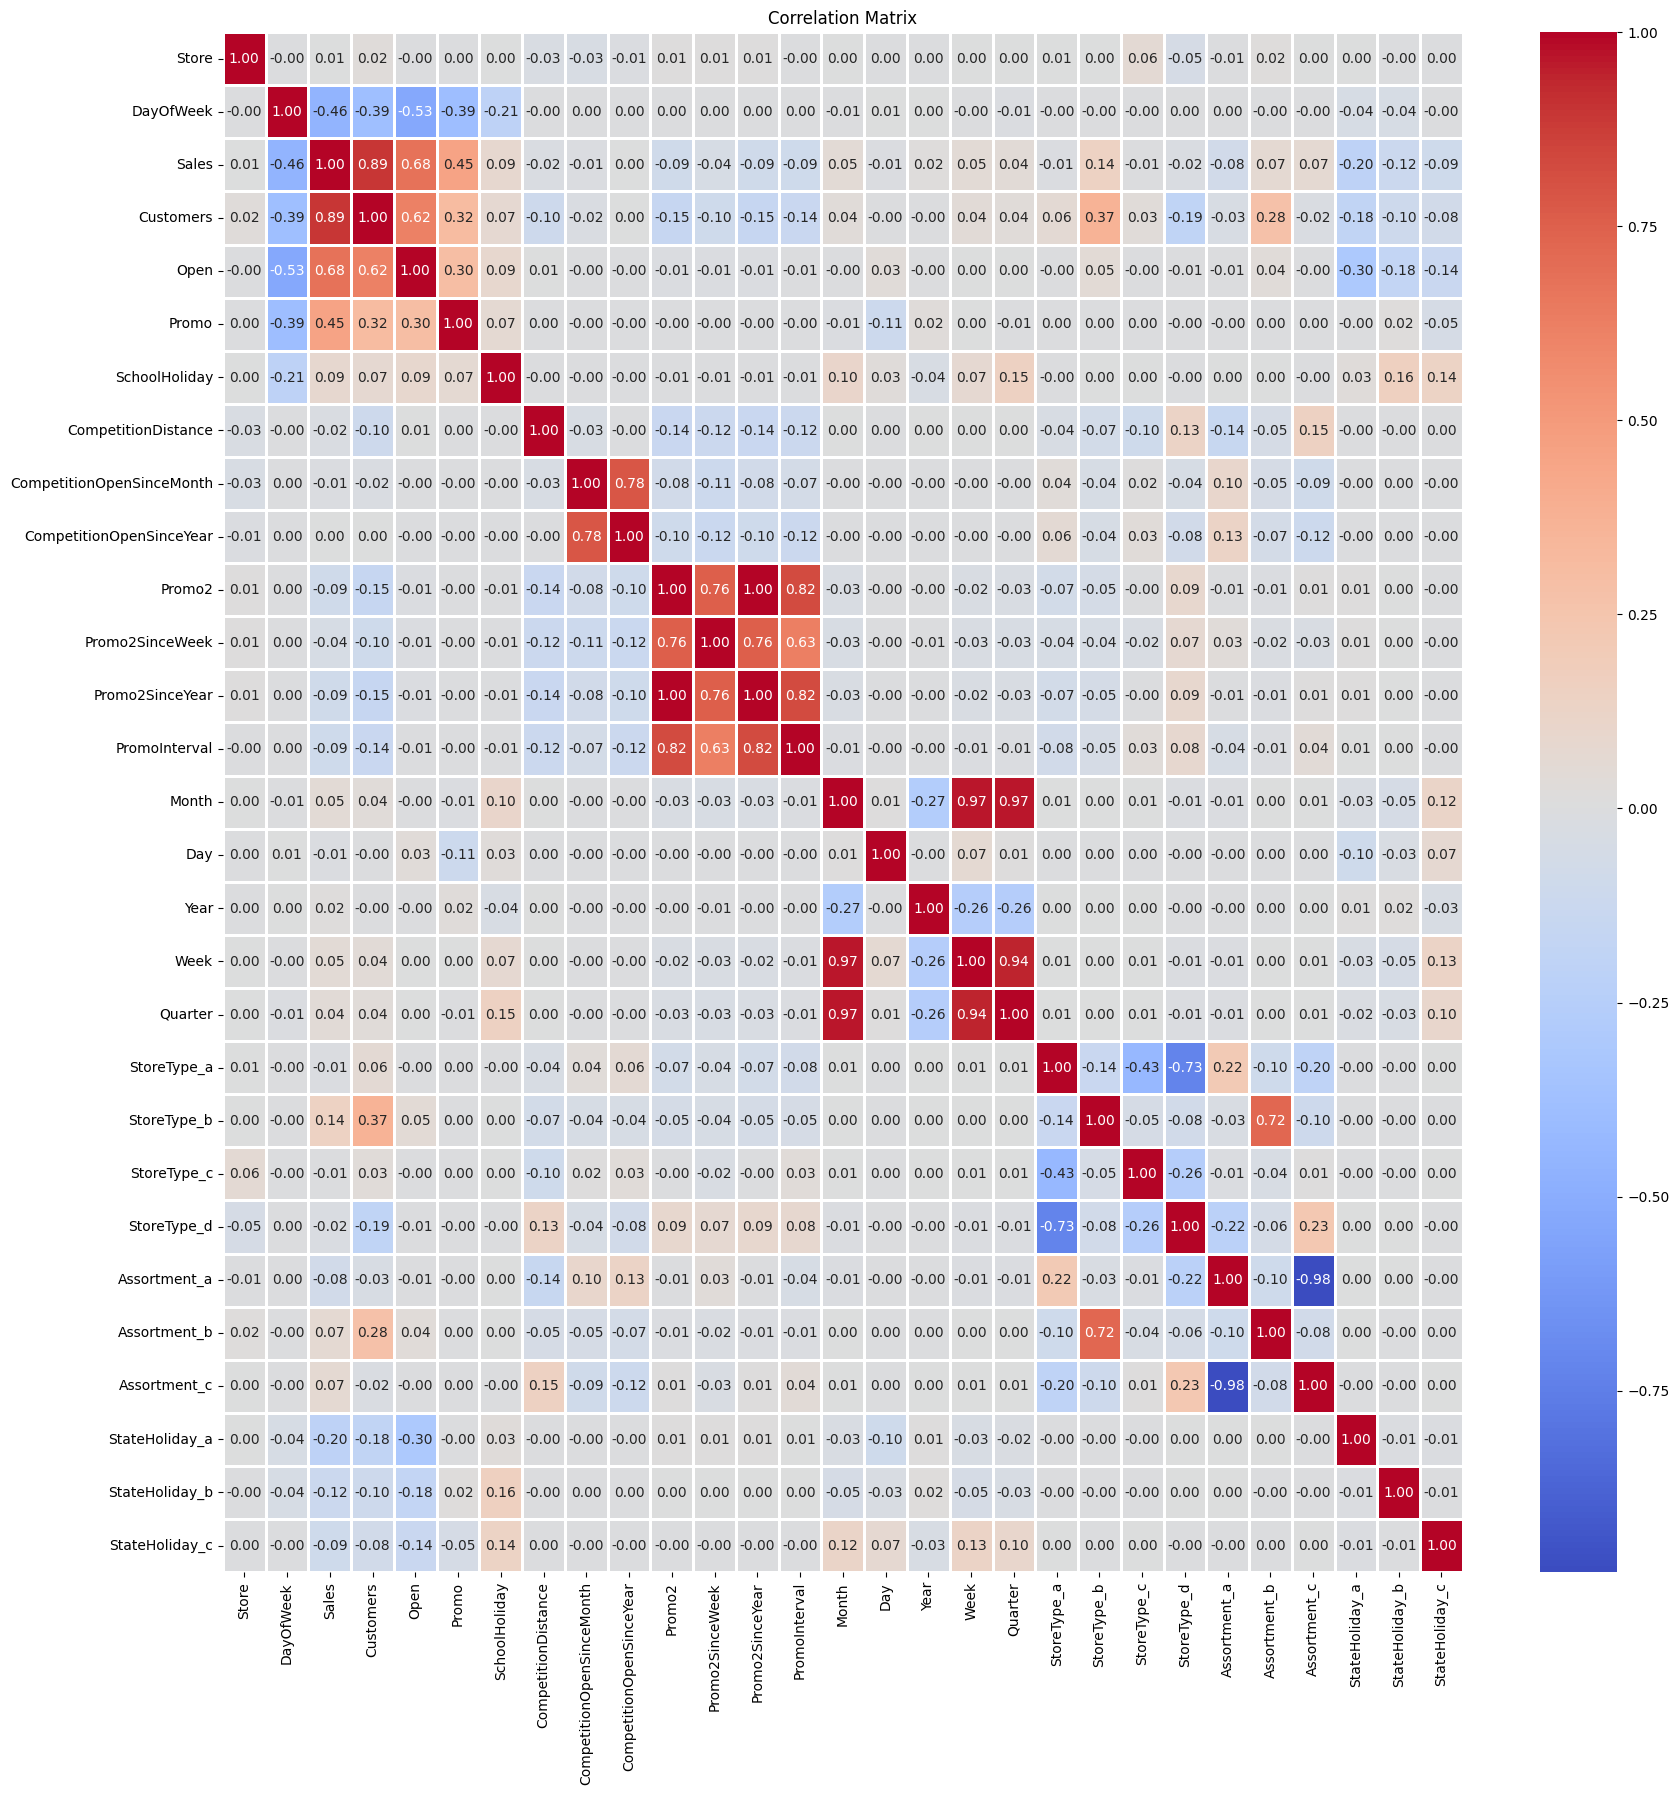

In [107]:
# plot correlation matrix
plt.figure(figsize=(20, 20))
correlation_matrix = df_trainstore.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Matrix')
plt.show()

## Train Test Splitt

In [108]:
import numpy as np
from sklearn.model_selection import train_test_split

df_trainstore_frac = df_trainstore.sample(frac=0.005, random_state=42)

def split_data(df, test_size=0.2, random_state=42):
     X = df.drop('Sales', axis=1)
     y = df['Sales']
     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
     return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(df_trainstore_frac)

## KNN

RMSPE:  inf


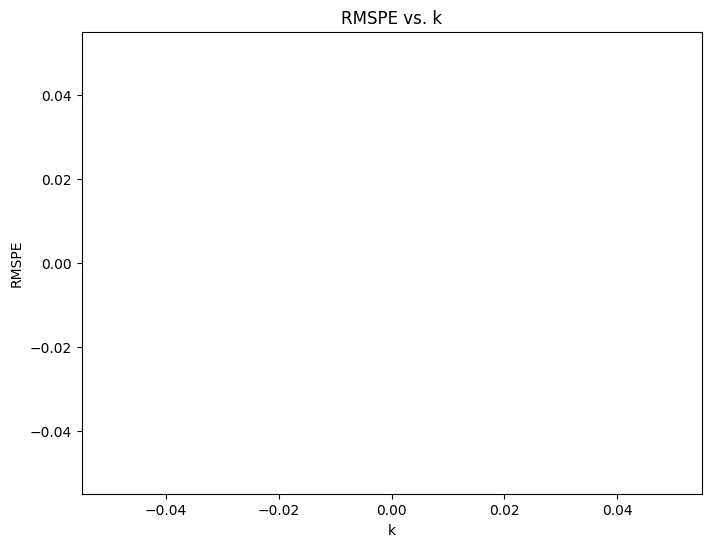

Best k:  1
Lowest RMSPE:  inf


In [109]:
# import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

def knn_regressor(X_train, X_test, y_train, k):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

# Assuming you have defined X_train, X_test, y_train somewhere in your code

# Use knn_regressor function to train the model with a specific k value
k_value = 5  # You can choose any k value
knn = knn_regressor(X_train, X_test, y_train, k_value)

# Evaluate the model with rmspe
def rmspe(y_true, y_pred):
    rmspe = np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))
    return rmspe

y_pred = knn.predict(X_test)
rmspe_knn = rmspe(y_test, y_pred)
print('RMSPE: ', rmspe_knn)

# Use knn_regressor function to train the model with different k values and plot the rmspe
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
rmspe_values = []

for k in k_values:
    knn = knn_regressor(X_train, X_test, y_train, k)
    y_pred = knn.predict(X_test)
    rmspe_knn = rmspe(y_test, y_pred)
    rmspe_values.append(rmspe_knn)

plt.figure(figsize=(8, 6))
plt.plot(k_values, rmspe_values, marker='o', linestyle='--', color='b')
plt.title('RMSPE vs. k')
plt.xlabel('k')
plt.ylabel('RMSPE')
plt.show()

# get the best k value
best_k = k_values[np.argmin(rmspe_values)]
print('Best k: ', best_k)
print('Lowest RMSPE: ', min(rmspe_values))



## RF Regressor

In [110]:
# import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

def random_forest_regressor(X_train, X_test, y_train, n_estimators, max_depth, min_samples_split, min_samples_leaf):
    rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    rf.fit(X_train, y_train)
    return rf

# use random_forest_regressor function to find best n_estimators, max_depth, min_samples_split, and min_samples_leaf
n_estimators = [10, 30]
max_depth = [10, 30]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8, 10]

rmspe_values = []

for n in n_estimators:
    print('n_estimators: ', n)
    for m in max_depth:
        print('max_depth: ', m)
        for s in min_samples_split:
            for l in min_samples_leaf:
                rf = random_forest_regressor(X_train, X_test, y_train, n, m, s, l)
                y_pred = rf.predict(X_test)
                rmspe_rf = rmspe(y_test, y_pred)
                rmspe_values.append(rmspe_rf)

# get the best n_estimators, max_depth, min_samples_split, and min_samples_leaf
best_params = np.argmin(rmspe_values)

n_estimators:  10
max_depth:  10
max_depth:  30
n_estimators:  30
max_depth:  10
max_depth:  30


In [111]:
best_params = np.argmin(rmspe_values)

# get the best n_estimators, max_depth, min_samples_split, and min_samples_leaf
best_params = np.argmin(rmspe_values)
best_n_estimators = n_estimators[best_params // (len(max_depth) * len(min_samples_split) * len(min_samples_leaf))]
best_max_depth = max_depth[(best_params // (len(min_samples_split) * len(min_samples_leaf))) % len(max_depth)]
best_min_samples_split = min_samples_split[(best_params // len(min_samples_leaf)) % len(min_samples_split)]
best_min_samples_leaf = min_samples_leaf[best_params % len(min_samples_leaf)]

print('Best n_estimators: ', best_n_estimators)
print('Best max_depth: ', best_max_depth)
print('Best min_samples_split: ', best_min_samples_split)
print('Best min_samples_leaf: ', best_min_samples_leaf)

# get lowest rmspe value
lowest_rmspe_rf = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe_rf)

Best n_estimators:  30
Best max_depth:  30
Best min_samples_split:  5
Best min_samples_leaf:  1
Lowest RMSPE:  0.15038914126906094


## XGBoost

In [112]:
# xgboost regressor
from xgboost import XGBRegressor

def xgboost_regressor(X_train, X_test, y_train, n_estimators, max_depth, learning_rate):
    xgb = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
    xgb.fit(X_train, y_train)
    return xgb

# use xgboost_regressor function to find best n_estimators, max_depth, and learning_rate
n_estimators = [100, 200, 300, 400, 500]
max_depth = [3, 5, 7, 9]
learning_rate = [0.01, 0.05, 0.1, 0.5]

rmspe_values = []

for n in n_estimators:
    for m in max_depth:
        for l in learning_rate:
            xgb = xgboost_regressor(X_train, X_test, y_train, n, m, l)
            y_pred = xgb.predict(X_test)
            rmspe_xgb = rmspe(y_test, y_pred)
            rmspe_values.append(rmspe_xgb)

# get the best n_estimators, max_depth, and learning_rate
best_params = np.argmin(rmspe_values)
best_n_estimators = n_estimators[best_params // (len(max_depth) * len(learning_rate))]
best_max_depth = max_depth[(best_params // len(learning_rate)) % len(max_depth)]
best_learning_rate = learning_rate[best_params % len(learning_rate)]

print('Best n_estimators: ', best_n_estimators)
print('Best max_depth: ', best_max_depth)
print('Best learning_rate: ', best_learning_rate)

# get lowest rmspe value
lowest_rmspe_xg = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe_xg)

## LightGBM

In [ ]:
# import LightGBM
from lightgbm import LGBMRegressor

def lightgbm_regressor(X_train, X_test, y_train, n_estimators, max_depth, learning_rate):
    lgbm = LGBMRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
    lgbm.fit(X_train, y_train)
    return lgbm

# use lightgbm_regressor function to find best n_estimators, max_depth, and learning_rate
n_estimators = [100, 200, 300, 400, 500]
max_depth = [3, 5, 7, 9]
learning_rate = [0.01, 0.05, 0.1, 0.5]

rmspe_values = []

for n in n_estimators:
    for m in max_depth:
        for l in learning_rate:
            lgbm = lightgbm_regressor(X_train, X_test, y_train, n, m, l)
            y_pred = lgbm.predict(X_test)
            rmspe_lgbm = rmspe(y_test, y_pred)
            rmspe_values.append(rmspe_lgbm)

# get the best n_estimators, max_depth, and learning_rate
best_params = np.argmin(rmspe_values)
best_n_estimators = n_estimators[best_params // (len(max_depth) * len(learning_rate))]
best_max_depth = max_depth[(best_params // len(learning_rate)) % len(max_depth)]
best_learning_rate = learning_rate[best_params % len(learning_rate)]

print('Best n_estimators: ', best_n_estimators)
print('Best max_depth: ', best_max_depth)
print('Best learning_rate: ', best_learning_rate)

# get lowest rmspe value
lowest_rmspe_lightgbm = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe_lightgbm)


n_estimators:  50
n_estimators:  100
n_estimators:  150
n_estimators:  200
Best n_estimators:  100
Best learning_rate:  0.1
Lowest RMSPE:  21.180238003571713


## DecisionTree

In [ ]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

def decision_tree_regressor(X_train, X_test, y_train, max_depth, min_samples_split, min_samples_leaf):
    dt = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    dt.fit(X_train, y_train)
    return dt

# use decision_tree_regressor function to find best max_depth, min_samples_split, and min_samples_leaf

max_depth = [10, 30, 50, 70]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

rmspe_values = []

for m in max_depth:
    print('max_depth: ', m)
    for s in min_samples_split:
        for l in min_samples_leaf:
            dt = decision_tree_regressor(X_train, X_test, y_train, m, s, l)
            y_pred = dt.predict(X_test)
            rmspe_dt = rmspe(y_test, y_pred)
            rmspe_values.append(rmspe_dt)

# get the best max_depth, min_samples_split, and min_samples_leaf
best_params = np.argmin(rmspe_values)
best_max_depth = max_depth[(best_params // (len(min_samples_split) * len(min_samples_leaf))) % len(max_depth)]
best_min_samples_split = min_samples_split[(best_params // len(min_samples_leaf)) % len(min_samples_split)]
best_min_samples_leaf = min_samples_leaf[best_params % len(min_samples_leaf)]

print('Best max_depth: ', best_max_depth)
print('Best min_samples_split: ', best_min_samples_split)
print('Best min_samples_leaf: ', best_min_samples_leaf)

# get lowest rmspe value
lowest_rmspe_dt = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe_dt)

kernel:  linear
kernel:  poly
kernel:  rbf
kernel:  sigmoid
Best kernel:  rbf
Best C:  1
Best epsilon:  0.1
Lowest RMSPE:  0.987820217432104


## AdaBoost

In [ ]:
# ada boost regressor
from sklearn.ensemble import AdaBoostRegressor

def ada_boost_regressor(X_train, X_test, y_train, n_estimators, learning_rate):
    ada = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
    ada.fit(X_train, y_train)
    return ada

# use ada_boost_regressor function to find best n_estimators and learning_rate
n_estimators = [50, 100, 150, 200]
learning_rate = [0.1, 0.5, 1.0]

rmspe_values = []

for n in n_estimators:
    print('n_estimators: ', n)
    for l in learning_rate:
        ada = ada_boost_regressor(X_train, X_test, y_train, n, l)
        y_pred = ada.predict(X_test)
        rmspe_ada = rmspe(y_test, y_pred)
        rmspe_values.append(rmspe_ada)

# get the best n_estimators and learning_rate
best_params = np.argmin(rmspe_values)
best_n_estimators = n_estimators[best_params // len(learning_rate)]
best_learning_rate = learning_rate[best_params % len(learning_rate)]

print('Best n_estimators: ', best_n_estimators)
print('Best learning_rate: ', best_learning_rate)

# get lowest rmspe value
lowest_rmspe_ada = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe_ada)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to 

Best C:  0.5
Best epsilon:  0.1
Lowest RMSPE:  5.649536128515804


/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


## SVR

In [ ]:
# support vector regressor
from sklearn.svm import SVR

def svr_regressor(X_train, X_test, y_train, kernel, C, epsilon):
    svr = SVR(kernel=kernel, C=C, epsilon=epsilon)
    svr.fit(X_train, y_train)
    return svr

# use svr_regressor function to find best kernel, C, and epsilon
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = [0.1, 1, 10]
epsilon = [0.1, 0.5, 1.0]

rmspe_values = []

for k in kernel:
    print('kernel: ', k)
    for c in C:
        for e in epsilon:
            svr = svr_regressor(X_train, X_test, y_train, k, c, e)
            y_pred = svr.predict(X_test)
            rmspe_svr = rmspe(y_test, y_pred)
            rmspe_values.append(rmspe_svr)

# get the best kernel, C, and epsilon
best_params = np.argmin(rmspe_values)
best_kernel = kernel[best_params // (len(C) * len(epsilon))]
best_C = C[(best_params // len(epsilon)) % len(C)]
best_epsilon = epsilon[best_params % len(epsilon)]

print('Best kernel: ', best_kernel)
print('Best C: ', best_C)
print('Best epsilon: ', best_epsilon)

# get lowest rmspe value
lowest_rmspe_svr = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe_svr)

RMSPE: 4.215848767291712


## LinearSVR

In [ ]:
# svm regressor
from sklearn.svm import LinearSVR

def linear_svr_regressor(X_train, X_test, y_train, C, epsilon):
    lsvr = LinearSVR(C=C, epsilon=epsilon)
    lsvr.fit(X_train, y_train)
    return lsvr

# use linear_svr_regressor function to find best C and epsilon

C = [0.1, 0.5, 1, 10, 20]
epsilon = [0.1, 0.5, 1.0, 1.5, 2.0]

rmspe_values = []

for c in C:
    for e in epsilon:
        lsvr = linear_svr_regressor(X_train, X_test, y_train, c, e)
        y_pred = lsvr.predict(X_test)
        rmspe_lsvr = rmspe(y_test, y_pred)
        rmspe_values.append(rmspe_lsvr)

# get the best C and epsilon
best_params = np.argmin(rmspe_values)
best_C = C[best_params // len(epsilon)]
best_epsilon = epsilon[best_params % len(epsilon)]

print('Best C: ', best_C)
print('Best epsilon: ', best_epsilon)

# get lowest rmspe value
lowest_rmspe_linearsvr = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe_linearsvr)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/l

Best C:  10
Best epsilon:  0.1
Lowest RMSPE:  20.654570842669028


/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to 

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

def linear_regression(X_train, X_test, y_train):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    return lr

# Use linear_regression function to train the model
lr = linear_regression(X_train, X_test, y_train)

# Evaluate the model with RMSPE
y_pred = lr.predict(X_test)
rmspe_lr = rmspe(y_test, y_pred)
print('RMSPE:', rmspe_lr)


RMSPE: 30.193844190132797


## Gradient Boosting

In [ ]:
# gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

def gradient_boosting_regressor(X_train, X_test, y_train, n_estimators, max_depth, min_samples_split, min_samples_leaf, learning_rate):
    gb = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, learning_rate=learning_rate, random_state=42)
    gb.fit(X_train, y_train)
    return gb

# use gradient_boosting_regressor function to find best n_estimators, max_depth, min_samples_split, min_samples_leaf, and learning_rate
n_estimators = [200]
max_depth = [3, 5, 7]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
learning_rate = [0.1, 0.5, 1.0]

rmspe_values = []

for n in n_estimators:
    print('n_estimators: ', n)
    for m in max_depth:
        print('max_depth: ', m)
        for s in min_samples_split:
            for l in min_samples_leaf:
                for lr in learning_rate:
                    gb = gradient_boosting_regressor(X_train, X_test, y_train, n, m, s, l, lr)
                    y_pred = gb.predict(X_test)
                    rmspe_gb = rmspe(y_test, y_pred)
                    rmspe_values.append(rmspe_gb)

# get the best n_estimators, max_depth, min_samples_split, min_samples_leaf, and learning_rate
best_params = np.argmin(rmspe_values)
best_n_estimators = n_estimators[best_params // (len(max_depth) * len(min_samples_split) * len(min_samples_leaf) * len(learning_rate))]
best_max_depth = max_depth[(best_params // (len(min_samples_split) * len(min_samples_leaf) * len(learning_rate))) % len(max_depth)]
best_min_samples_split = min_samples_split[(best_params // (len(min_samples_leaf) * len(learning_rate))) % len(min_samples_split)]
best_min_samples_leaf = min_samples_leaf[(best_params // len(learning_rate)) % len(min_samples_leaf)]
best_learning_rate = learning_rate[best_params % len(learning_rate)]

print('Best n_estimators: ', best_n_estimators)
print('Best max_depth: ', best_max_depth)
print('Best min_samples_split: ', best_min_samples_split)
print('Best min_samples_leaf: ', best_min_samples_leaf)
print('Best learning_rate: ', best_learning_rate)

# get lowest rmspe value
lowest_rmspe_gradientboosting = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe_gradientboosting)


## Vergleich der Modelle per RMSPE

In [ ]:
# get the best models and their RMSPE values
models = ['KNN', 'Random Forest', 'XGBoost', 'LightGBM', 'Decision Tree', 'AdaBoost', 'SVR', 'Linear SVR', 'Linear Regression', 'Gradient Boosting']
rmspe_values = [rmspe_knn, lowest_rmspe_rf, lowest_rmspe_xg, lowest_rmspe_lightgbm, lowest_rmspe_dt, lowest_rmspe_ada, lowest_rmspe_svr, lowest_rmspe_linearsvr, rmspe_lr, lowest_rmspe_gradientboosting]

best_model = models[np.argmin(rmspe_values)]
lowest_rmspe = np.min(rmspe_values)

# chart the best model and its RMSPE value
plt.figure(figsize=(8, 6))
plt.bar(models, rmspe_values, color='skyblue')
plt.title('RMSPE Values of Different Models')
plt.xlabel('Models')
plt.ylabel('RMSPE')
plt.xticks(rotation=45)
plt.show()


NameError: name 'lowest_rmspe_rf' is not defined

## In der obrigen Grafik, kann man sehr gut sehen, das KNN, AdaBoost und auch die Linealen Regressoren nicht geeignet sind.

In [ ]:
# # neural network regressor
# from sklearn.neural_network import MLPRegressor

# def neural_network_regressor(X_train, X_test, y_train, hidden_layer_sizes, activation, solver, alpha, learning_rate):
#     nn = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, alpha=alpha, learning_rate=learning_rate, random_state=42)
#     nn.fit(X_train, y_train)
#     return nn

# # use neural_network_regressor function to find best hidden_layer_sizes, activation, solver, alpha, and learning_rate
# hidden_layer_sizes = [(100,), (200,)]
# activation = ['identity', 'logistic', 'tanh', 'relu']
# solver = ['sgd', 'adam']
# alpha = [0.001, 0.01, 0.1]
# learning_rate = ['constant', 'invscaling', 'adaptive']

# rmspe_values = []

# for h in hidden_layer_sizes:
#     for a in activation:
#         for s in solver:
#             for al in alpha:
#                 for l in learning_rate:
#                     nn = neural_network_regressor(X_train, X_test, y_train, h, a, s, al, l)
#                     y_pred = nn.predict(X_test)
#                     rmspe_nn = rmspe(y_test, y_pred)
#                     rmspe_values.append(rmspe_nn)

# # get the best hidden_layer_sizes, activation, solver, alpha, and learning_rate
# best_params = np.argmin(rmspe_values)
# best_hidden_layer_sizes = hidden_layer_sizes[best_params // (len(activation) * len(solver) * len(alpha) * len(learning_rate))]
# best_activation = activation[(best_params // (len(solver) * len(alpha) * len(learning_rate))) % len(activation)]
# best_solver = solver[(best_params // (len(alpha) * len(learning_rate)) % len(solver))]
# best_alpha = alpha[(best_params // len(learning_rate)) % len(alpha)]
# best_learning_rate = learning_rate[best_params % len(learning_rate)]

# print('Best hidden_layer_sizes: ', best_hidden_layer_sizes)
# print('Best activation: ', best_activation)
# print('Best solver: ', best_solver)
# print('Best alpha: ', best_alpha)
# print('Best learning_rate: ', best_learning_rate)

# # get lowest rmspe value
# lowest_rmspe_nn = np.min(rmspe_values)
# print('Lowest RMSPE: ', lowest_rmspe_nn)

In [ ]:
# import torch
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split

# # Assuming df_trainstore and other variables are properly defined

# # Convert data to PyTorch tensors
# x_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
# x_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# # Define RMSPE function
# def rmspe(y_true, y_pred):
#     percentage_error = ((y_true - y_pred) / y_true) ** 2
#     return torch.sqrt(torch.mean(percentage_error))

# # Define function to get batch data
# def get_batch(x, y, batch_size):
#     for i in range(0, len(x), batch_size):
#         yield x[i:i+batch_size], y[i:i+batch_size]

# # Define neural network model
# class MyModel(torch.nn.Module):
#     def __init__(self):
#         super(MyModel, self).__init__()
#         self.fc1 = torch.nn.Linear(30, 15)
#         self.fc2 = torch.nn.Linear(15, 1)
#         self.batch_norm = torch.nn.BatchNorm1d(15)
#         self.relu = torch.nn.ReLU()

#     def forward(self, xb):
#         xb = self.relu(self.fc1(xb))
#         xb = self.batch_norm(xb)
#         xb = self.fc2(xb)
#         return xb

# # Set hyperparameters
# lr = 0.001
# batch_size = 15
# epochs = 50

# # Initialize model and optimizer
# model = MyModel()
# optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# losses = []
# rmspe_test = []

# # Training loop
# for epoch in range(epochs):
#     losses_in_epoch = []
#     for xb, yb in get_batch(x_train_tensor, y_train_tensor, batch_size):
#         optimizer.zero_grad()
#         y_pred = model(xb)
#         loss = rmspe(y_pred, yb)
#         loss.backward()
#         optimizer.step()
#         losses_in_epoch.append(loss.item())
    
#     # Compute average loss for the epoch
#     epoch_loss = sum(losses_in_epoch) / len(losses_in_epoch)
#     losses.append(epoch_loss)
    
#     # Compute RMSPE on test data
#     with torch.no_grad():
#         y_test_hat = model(x_test_tensor)
#         epoch_rmspe_test = rmspe(y_test_hat, y_test_tensor)
#         rmspe_test.append(epoch_rmspe_test.item())

#     print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, RMSPE on Test Data: {epoch_rmspe_test:.4f}")

# # Plotting
# plt.plot(range(epochs), losses, color="blue")
# plt.plot(range(epochs), rmspe_test, color="red")
# plt.legend(["loss", "rmspe_test"])
# plt.xlabel("Epoch")
# plt.ylabel("Loss/RMSPE")
# plt.title("Training Loss and RMSPE on Test Data")
# plt.show()


In [ ]:
# optimzie best models with grid search startig with random forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 30, 50, 70],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print('Best Parameters for Random Forest: ', best_params_rf)

# Get the best model
best_model_rf = grid_search_rf.best_estimator_
print('Best Model for Random Forest: ', best_model_rf)

# Evaluate the best model
y_pred_rf = best_model_rf.predict(X_test)
rmspe_rf = rmspe(y_test, y_pred_rf)
print('RMSPE for Random Forest: ', rmspe_rf)
print("Accuracy: ", best_model_rf.score(X_test, y_test))

In [ ]:
# optimize xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# import rmspe
def rmspe(y_true, y_pred):
    rmspe = np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))
    return rmspe

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

# Initialize the model
xgb = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_
print('Best Parameters for XGBoost: ', best_params_xgb)

# Get the best model
best_model_xgb = grid_search_xgb.best_estimator_
print('Best Model for XGBoost: ', best_model_xgb)

# Evaluate the best model
y_pred_xgb = best_model_xgb.predict(X_test)
rmspe_xgb = rmspe(y_test, y_pred_xgb)
print('RMSPE for XGBoost: ', rmspe_xgb)
print("Accuracy: ", best_model_xgb.score(X_test, y_test))

In [ ]:
# optimize gradient boosting regressor with grid search
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Initialize the model
gb = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_gb.fit(X_train, y_train)

# Get the best parameters
best_params_gb = grid_search_gb.best_params_
print('Best Parameters for Gradient Boosting: ', best_params_gb)

# Get the best model
best_model_gb = grid_search_gb.best_estimator_
print('Best Model for Gradient Boosting: ', best_model_gb)

# Evaluate the best model
y_pred_gb = best_model_gb.predict(X_test)
rmspe_gb = rmspe(y_test, y_pred_gb)
print('RMSPE for Gradient Boosting: ', rmspe_gb)
print("Accuracy: ", best_model_gb.score(X_test, y_test))



In [ ]:
# permuation feature importance
from sklearn.inspection import permutation_importance

# Get the permutation importance
perm_importance = permutation_importance(best_model_gb, X_test, y_test, n_repeats=10, random_state=42)

# Get the feature importance
feature_importance = perm_importance.importances_mean

# Get the feature names
feature_names = X_test.columns

# Create a DataFrame
df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()



In [ ]:
# ensemble model
from sklearn.ensemble import VotingRegressor

# Initialize the ensemble model
ensemble_model = VotingRegressor(estimators=[
    #('Random Forest', best_model_rf),
    ('XGBoost', best_model_xgb),
    ('Gradient Boosting', best_model_gb),
    #('Linear SVR', best_model_lsvr)
])

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)
rmspe_ensemble = rmspe(y_test, y_pred_ensemble)
print('RMSPE for Ensemble Model: ', rmspe_ensemble)

